<a href="https://colab.research.google.com/github/Mariamzoair/bayesian-dice-linear-regression/blob/main/DSBootcamp_Fall2025_Week7_MariamZoair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Mariam Zoair
**Email:**msz7005@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3])   # uniform prior over the three dice
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    # P(K = k) = C(n, k) * p^k * (1-p)^(n-k)
    comb = math.comb(n, k)
    return comb * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    # 1. choose a die at random (A, B, or C – all equally likely)
    true_die = np.random.choice(dice_names)
    p_six = dice_probs[true_die]

    # 2. roll it n_rolls times and count sixes
    rolls = np.random.rand(n_rolls) < p_six
    k = rolls.sum()

    return true_die, k

def posterior_given_k(k):
    # likelihoods P(k | Die)
    likelihoods = np.array([
        binomial_prob(n_rolls, k, dice_probs[die])
        for die in dice_names
    ])

    # Bayes' rule: posterior ∝ likelihood * prior
    unnorm_post = likelihoods * prior
    posterior = unnorm_post / unnorm_post.sum()
    return posterior




## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [3]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

# Design matrix with bias term
X = np.c_[np.ones(len(x)), x]

# Normal equation: theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Predictions
y_pred = X @ theta

# Mean squared error
mse_linear = np.mean((y_pred - y) ** 2)

print('Linear theta:', theta, 'MSE:', mse_linear)


Linear theta: [ 5.00000000e+00 -5.55111512e-17] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

------ α = 1/400 ------
step 0: w = 13.000000, f(w) = 8.000000e+01
step 1: w = 12.600000, f(w) = 3.276800e+01
step 2: w = 12.395200, f(w) = 1.894593e+01
step 3: w = 12.259406, f(w) = 1.257864e+01
step 4: w = 12.159529, f(w) = 9.038498e+00

------ α = 1/4,000,000 ------
step 0: w = 13.000000, f(w) = 8.000000e+01
step 1: w = 12.999960, f(w) = 7.999360e+01
step 2: w = 12.999920, f(w) = 7.998720e+01
step 3: w = 12.999880, f(w) = 7.998080e+01
step 4: w = 12.999840, f(w) = 7.997441e+01


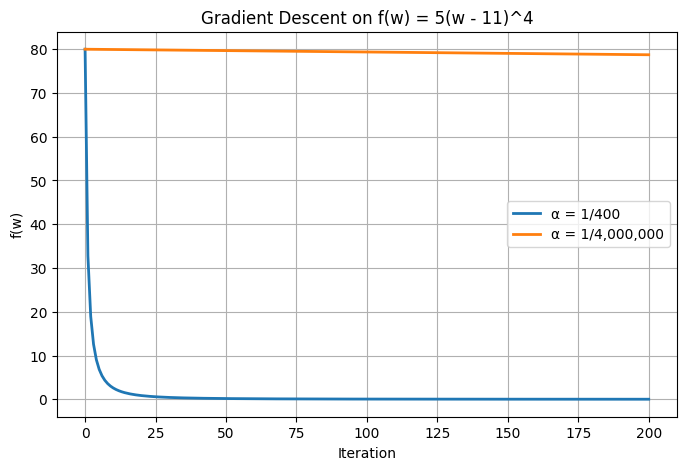

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    w = w0
    history = [w]  # store values of w

    for _ in range(steps):
        grad = 20 * (w - 11)**3     # derivative of f(w) = 5(w-11)^4
        w = w - alpha * grad        # gradient descent update
        history.append(w)

    return np.array(history)

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

# Print first 5 steps
print("------ α = 1/400 ------")
for i in range(5):
    print(f"step {i}: w = {hist_140[i]:.6f}, f(w) = {5*(hist_140[i]-11)**4:.6e}")

print("\n------ α = 1/4,000,000 ------")
for i in range(5):
    print(f"step {i}: w = {hist_180[i]:.6f}, f(w) = {5*(hist_180[i]-11)**4:.6e}")

# Plot results
plt.figure(figsize=(8,5))
plt.plot([5*(w-11)**4 for w in hist_140], label='α = 1/400', linewidth=2)
plt.plot([5*(w-11)**4 for w in hist_180], label='α = 1/4,000,000', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('f(w)')
plt.title('Gradient Descent on f(w) = 5(w - 11)^4')
plt.legend()
plt.grid(True)
plt.show()
